# Load Dependencies

In [ ]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
from Script.path import *
from Script.figure import get_all_max100

# Load Data

In [2]:
data_dir = './Data/data_cc/'
rundata_dir = './Data/rundata_cc/'
df=pd.read_csv(data_dir+"experiment_index_order.csv", index_col=0)
df = df.sort_values(by='yield')
df.reset_index(drop=True, inplace=True)
df['entry'] = df.index
df.set_index('entry', inplace=True)
ele_smi=df['Electrophile_SMILES'].tolist()
nuc_smi=df['Nucleophile_SMILES'].tolist()
lig_smi=df['Ligand_SMILES'].tolist()
base_smi=df['Base_SMILES'].tolist()
sol_smi=df['Solvent_SMILES'].tolist()
yield_value=np.array(df['yield'].tolist())

ele_smi_set = sorted(list(set(ele_smi)))
nuc_smi_set = sorted(list(set(nuc_smi)))
lig_smi_set = sorted(list(set(lig_smi)))
base_smi_set = sorted(list(set(base_smi)))
sol_smi_set = sorted(list(set(sol_smi)))

# Find the Trajectory with the Smallest Cumulative Deviation

In [3]:
all_results = np.load('./Results/results_cc/cc-ourwork-5-4-3-2-50-50-50-50-low_rate10_dft_Ridge_total.npy',allow_pickle=True)
all_max100=get_all_max100(all_results)
recorded_max_mean = np.array(all_max100).mean(axis=0)

all_diff = []
for i in all_max100:
    tem_diff = 0
    for j in range(10):
        tem_diff += abs(recorded_max_mean[j] - i[j])
    all_diff.append(tem_diff)
test_data = all_results[all_diff.index(min(all_diff))]  

In [4]:
all_results[all_diff.index(min(all_diff))]  

array([ 8.15,  1.22,  9.92, 11.38, 11.56, 25.49, 10.61, 79.45, 11.82,
       33.88, 65.57, 91.37, 61.62, 74.29, 72.45, 35.12, 94.32, 81.52,
       60.4 , 83.19, 75.5 , 15.23, 60.87, 66.05, 12.83, 95.88, 53.51,
       56.64, 15.14, 66.  , 13.69, 69.81, 60.95, 38.96, 43.22, 66.25,
       75.06, 15.81, 79.94, 24.54, 31.51, 90.64, 88.37, 90.21, 91.45,
       77.21, 87.6 , 92.42, 93.95, 91.4 ])

In [5]:
for file in glob.glob('./Data/rundata_cc/results_optimization/index_cc-ourwork-5-4-3-2-50-50-50-50-low_rate10_dft_Ridge_*.npy'):
    tem_data = np.load(file,allow_pickle=True)[:,:,5][0]
    tem_sum = 0
    for index in range(50):
        tem_sum += abs(tem_data[index]-test_data[index])
    if  tem_sum < 1:
        print(file)

In [6]:
np.load('./Data/rundata_cc/results_optimization/index_cc-ourwork-5-4-3-2-50-50-50-50-low_rate10_dft_Ridge_29.npy',allow_pickle=True)[:,:,5][0]

array([8.15, 1.22, 9.92, 11.38, 11.56, 13.95, 43.21, 19.51, 18.03, 24.97,
       19.51, 43.15, 78.78, 10.61, 21.45, 16.5, 88.43, 20.16, 34.96,
       60.68, 66.4, 55.89, 91.17, 94.67, 87.27, 17.82, 72.98, 84.23,
       62.59, 86.82, 9.8, 17.32, 67.16, 39.4, 96.49, 93.95, 18.94, 90.75,
       21.95, 73.12, 14.49, 14.49, 9.76, 52.13, 57.36, 78.96, 94.47,
       92.82, 96.7, 93.7], dtype=object)

# Plot Figure

In [7]:
data_dir = './Data/data_cc/'
rundata_dir = './Data/rundata_cc/'
df=pd.read_csv(data_dir+"experiment_index_order.csv", index_col=0)
df = df.sort_values(by='yield')
df.reset_index(drop=True, inplace=True)
df['entry'] = df.index
df.set_index('entry', inplace=True)
ele_smi=df['Electrophile_SMILES'].tolist()
nuc_smi=df['Nucleophile_SMILES'].tolist()
lig_smi=df['Ligand_SMILES'].tolist()
base_smi=df['Base_SMILES'].tolist()
sol_smi=df['Solvent_SMILES'].tolist()
yield_value=np.array(df['yield'].tolist())

ele_smi_set = sorted(list(set(ele_smi)))
nuc_smi_set = sorted(list(set(nuc_smi)))
lig_smi_set = sorted(list(set(lig_smi)))
base_smi_set = sorted(list(set(base_smi)))
sol_smi_set = sorted(list(set(sol_smi)))

In [8]:
sorted_ele = get_sort_smi(ele_smi,ele_smi_set,yield_value)
sorted_nuc = get_sort_smi(nuc_smi,nuc_smi_set,yield_value)
sorted_lig = get_sort_smi(lig_smi,lig_smi_set,yield_value)
sorted_base = get_sort_smi(base_smi,base_smi_set,yield_value)
sorted_sol = get_sort_smi(sol_smi,sol_smi_set,yield_value)

re_target_dict = {}
for i in range(len(ele_smi)):
    re_target_dict[ele_smi[i],nuc_smi[i],lig_smi[i],base_smi[i],sol_smi[i]]=yield_value[i]

re_smi=[]
for i in sorted_ele:
    for j in sorted_nuc:
        for k in sorted_lig:
            re_smi.append([i,j,k])
con_smi=[]
for i in sorted_base:
    for j in sorted_sol:
        con_smi.append([i,j])
x=[]
y=[]        
hf_target=[]
space=[]
for index1,i in enumerate(re_smi):
    for index2,j in enumerate(con_smi):
        x.append(index1)
        y.append(index2)
        try:
            hf_target.append(re_target_dict[(i[0],i[1],i[2],j[0],j[1])])  
        except: 
            hf_target.append(0)
        space.append([i[0],i[1],i[2],j[0],j[1]])
hf_target=np.array(hf_target).reshape(len(re_smi),len(con_smi))
space = np.array(space).reshape(len(re_smi),len(con_smi),-1)

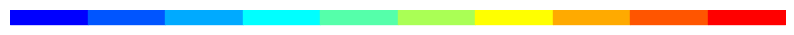

In [9]:
colors = ["blue", "cyan" ,"yellow", "red"]  # 可调整中间过渡色, "white", "cyan", "yellow",
n_colors = 10
cmap = LinearSegmentedColormap.from_list("blue_to_red", colors, N=n_colors)
color_list = cmap(np.linspace(0, 1, n_colors))

plt.figure(figsize=(10, 0.2))
for i, color in enumerate(color_list):
    plt.fill_between([i, i+1], 0, 1, color=color)
plt.xlim(0, n_colors)
plt.axis('off')
#plt.title(f'Generated {n_colors} colors (Blue → Red)')
plt.show()

## Top-K

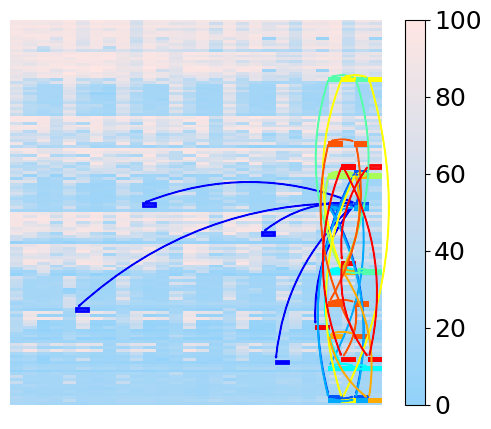

In [10]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names

cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 
all_exp_our = np.load('./Data/rundata_cc/results_optimization/index_cc-ourwork-1-1-1-1-100-100-100-100-low_rate10_dft_Ridge_29.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy4(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=0.1)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy4(i[j],space)
        x2,y2=get_xy4(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy4(i[m],space)
        x2,y2=get_xy4(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]

        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy4(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

## Our work

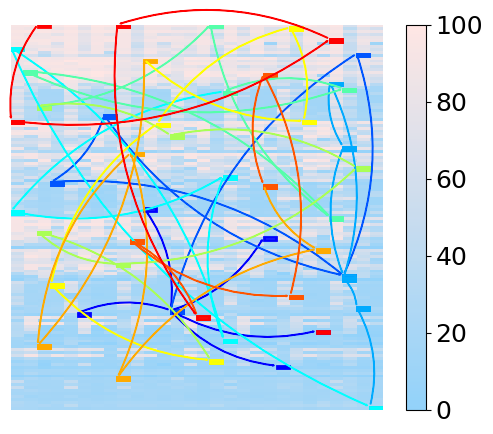

In [12]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

all_exp_our = np.load('./Data/rundata_cc/results_optimization/index_cc-ourwork-5-4-3-2-50-50-50-50-low_rate10_dft_Ridge_29.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy4(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy4(i[j],space)
        x2,y2=get_xy4(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy4(i[m],space)
        x2,y2=get_xy4(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy4(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

# PI

In [13]:
index = np.load('./Results/results_bayesian/cc_index_low_10.0_PI.npy')[29]
all_exp_our = np.array(df)[index].reshape(1,50,6)

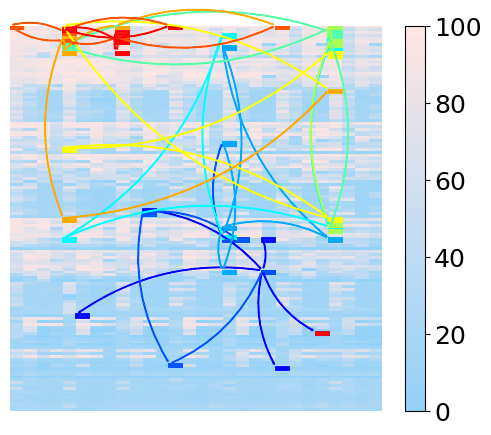

In [ ]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy4(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy4(i[j],space)
        x2,y2=get_xy4(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy4(i[m],space)
        x2,y2=get_xy4(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy4(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

# EI

In [15]:
index = np.load('./Results/results_bayesian/cc_index_low_10.0_EI.npy')[29]
all_exp_our = np.array(df)[index].reshape(1,50,6)

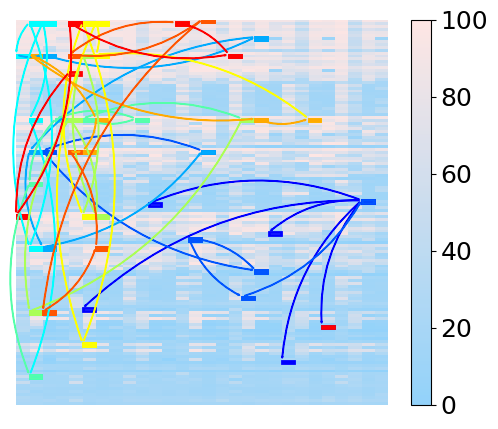

In [ ]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy4(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy4(i[j],space)
        x2,y2=get_xy4(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy4(i[m],space)
        x2,y2=get_xy4(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy4(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

# UCB

In [17]:
index = np.load('./Results/results_bayesian/cc_index_low_10.0_UCB.npy')[29]
all_exp_our = np.array(df)[index].reshape(1,50,6)

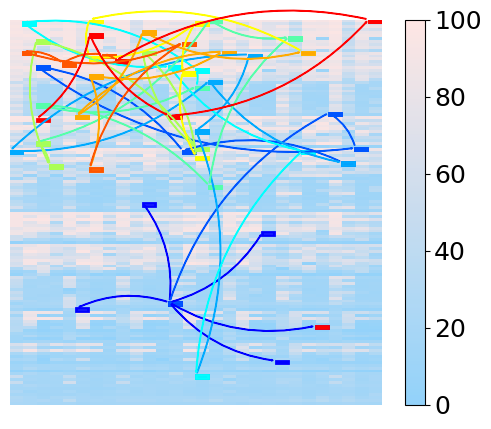

In [ ]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy4(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy4(i[j],space)
        x2,y2=get_xy4(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy4(i[m],space)
        x2,y2=get_xy4(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy4(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

# UCB-Standard-√𝟐

In [19]:
index = np.load('./Results/results_bayesian/cc_index_low_10.0_UCBstdgen2.npy')[29]
all_exp_our = np.array(df)[index].reshape(1,50,6)

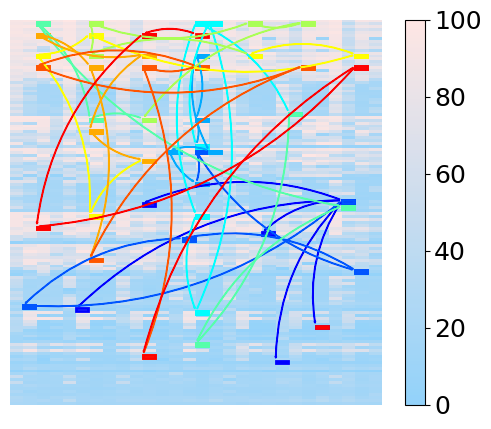

In [ ]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy4(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy4(i[j],space)
        x2,y2=get_xy4(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy4(i[m],space)
        x2,y2=get_xy4(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy4(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

# UCB-Standard-2

In [21]:
index = np.load('./Results/results_bayesian/cc_index_low_10.0_UCBstd2.npy')[29]
all_exp_our = np.array(df)[index].reshape(1,50,6)

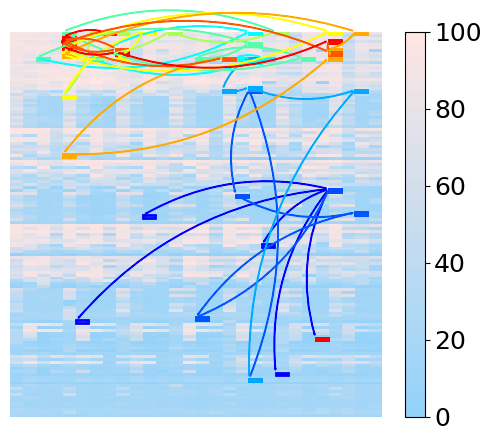

In [ ]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy4(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy4(i[j],space)
        x2,y2=get_xy4(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy4(i[m],space)
        x2,y2=get_xy4(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy4(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()